<a href="https://colab.research.google.com/github/pedroblossbraga/WineQuality-ImbalancedLearning/blob/main/IDATHA_challenge_02_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VinhoVerde database wine quality prediction


The goal here is to develop a Machine Learning model (trained with the VinhoVerde database) that is able to accurately predict the quality of a wine based on some physical and chemical atributes.

The database atributes are:

- fixed acidity
- volatile acidity
- citric acid
- residual sugar
- chlorides
- free sulfur dioxide
- total sulfur dioxide
- density
- pH
- sulphates
- alcohol
- quality


To build a meaningful scientifically valid model that aggregates value, one  must perform a couple of steps (varies on the problem):
- Extract/Load the data
- Exploratory Data Analysis (EDA) - explore the data, create hypothesis, search 
for patterns and problems in the dataset
  - Check for data inconsistencies
  - Check for outliers
  - Feature engineering, create valid variables (linear combination of original atributes)
- Data pre-processing/ Scaling
- Build the model
- Evaluate the model performance
- Estimate predictions




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os, sys
import warnings

os.listdir()

['.config', 'VinhoVerde.csv', 'sample_data']

## 1. Extracting/Loading the data

In [2]:
df = pd.read_csv(
    list(filter(lambda x : 'vinhoverde.csv' in x.lower(),
                os.listdir()
                ))[0]
)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
print('dataset has {} columns and {} rows'.format(
    df.shape[1], df.shape[0]
))

dataset has 12 columns and 1599 rows



## 2. Exploratory Data Analysis

## 2.1. Checking for inconsistencies

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [5]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

luckally, no NaNs found.

In [6]:
c = 0
for col in df.columns:
  types = set(map(lambda value: type(value),
                  df[col].values))
  if len(types) > 1:
    c+=1
    print('col {} has more than 1 type: {}'.format(col, types))

print('{} columns have more than 1 type.'.format(c))

0 columns have more than 1 type.


The attributes don't seem to have mixed types.

## 2.2. Checking for outliers and visualizing the distributions

The morfology of the the distributions can also be tested, identifying if there are any normally-distributed variables, with a certain significance level $\alpha \in [0,1]$. As usual, I'l set a default significance level of $\alpha = 0.05$, i.e., $95\%$ of certainty.

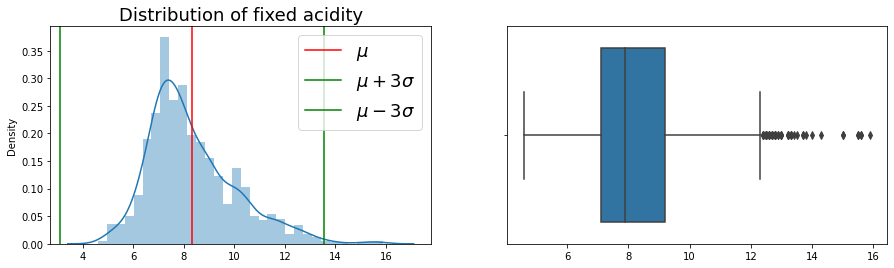

Shapiro-Wilk Test:  Sample does not look Gaussian (reject H0)
Agostino k^2 Test:  Sample does not look Gaussian (reject H0)
column fixed acidity has 12 values (0.750%) outside interval (3.0963,13.5429)
----------------------------------------


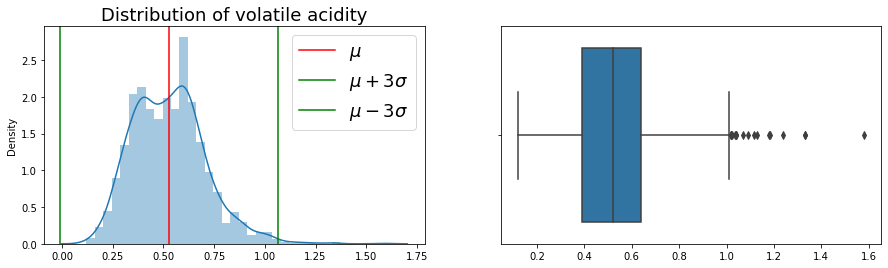

Shapiro-Wilk Test:  Sample does not look Gaussian (reject H0)
Agostino k^2 Test:  Sample does not look Gaussian (reject H0)
column volatile acidity has 10 values (0.625%) outside interval (-0.0094,1.0650)
----------------------------------------


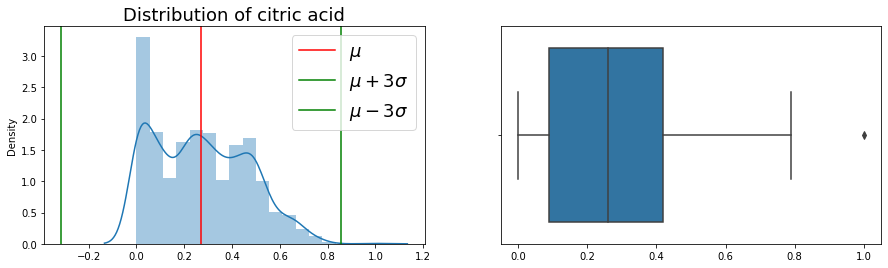

Shapiro-Wilk Test:  Sample does not look Gaussian (reject H0)
Agostino k^2 Test:  Sample does not look Gaussian (reject H0)
column citric acid has 1 values (0.063%) outside interval (-0.3134,0.8554)
----------------------------------------


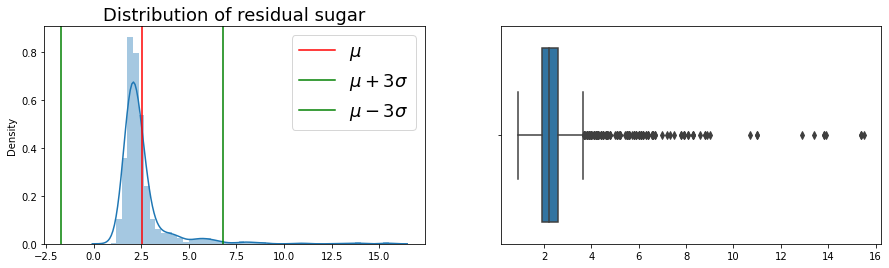

Shapiro-Wilk Test:  Sample does not look Gaussian (reject H0)
Agostino k^2 Test:  Sample does not look Gaussian (reject H0)
column residual sugar has 30 values (1.876%) outside interval (-1.6910,6.7686)
----------------------------------------


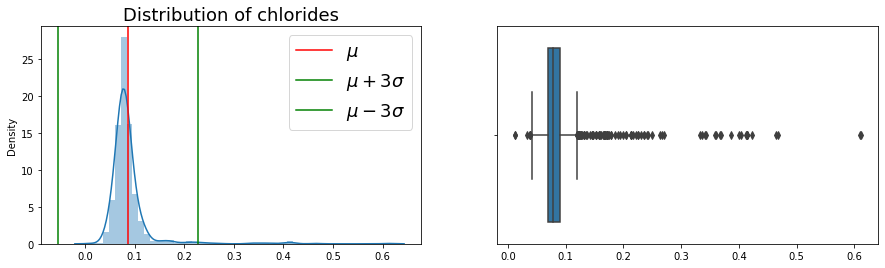

Shapiro-Wilk Test:  Sample does not look Gaussian (reject H0)
Agostino k^2 Test:  Sample does not look Gaussian (reject H0)
column chlorides has 31 values (1.939%) outside interval (-0.0537,0.2287)
----------------------------------------


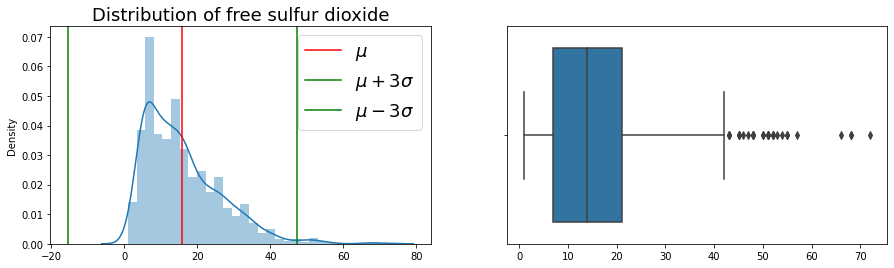

Shapiro-Wilk Test:  Sample does not look Gaussian (reject H0)
Agostino k^2 Test:  Sample does not look Gaussian (reject H0)
column free sulfur dioxide has 22 values (1.376%) outside interval (-15.5055,47.2554)
----------------------------------------


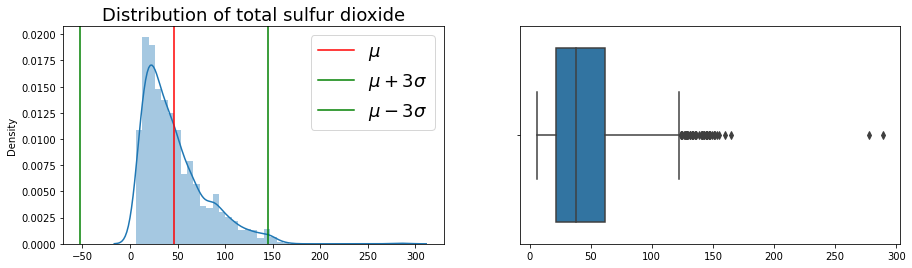

Shapiro-Wilk Test:  Sample does not look Gaussian (reject H0)
Agostino k^2 Test:  Sample does not look Gaussian (reject H0)
column total sulfur dioxide has 15 values (0.938%) outside interval (-52.2182,145.1538)
----------------------------------------


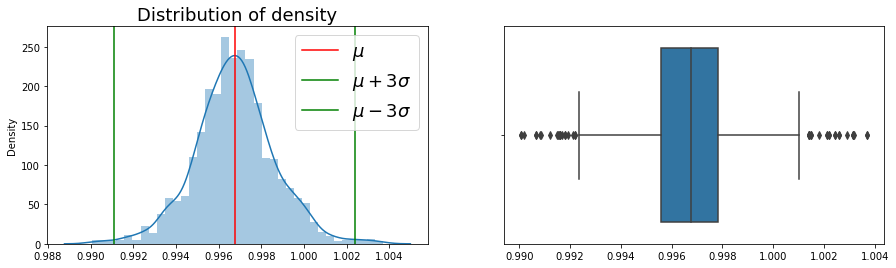

Shapiro-Wilk Test:  Sample does not look Gaussian (reject H0)
Agostino k^2 Test:  Sample does not look Gaussian (reject H0)
column density has 18 values (1.126%) outside interval (0.9911,1.0024)
----------------------------------------


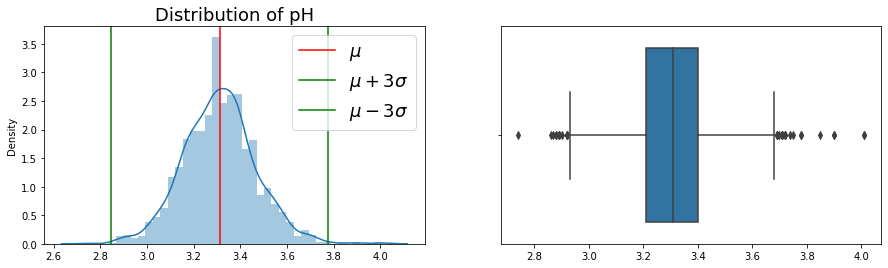

Shapiro-Wilk Test:  Sample does not look Gaussian (reject H0)
Agostino k^2 Test:  Sample does not look Gaussian (reject H0)
column pH has 8 values (0.500%) outside interval (2.8480,3.7743)
----------------------------------------


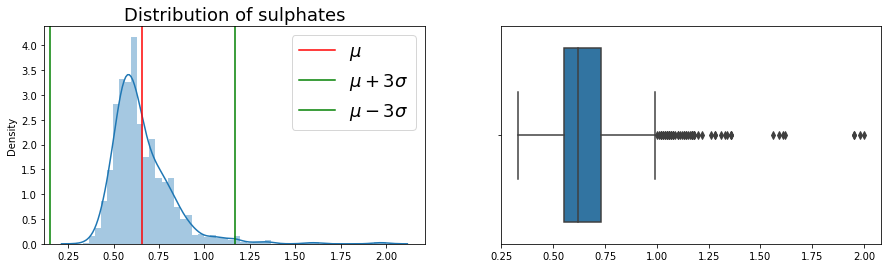

Shapiro-Wilk Test:  Sample does not look Gaussian (reject H0)
Agostino k^2 Test:  Sample does not look Gaussian (reject H0)
column sulphates has 27 values (1.689%) outside interval (0.1496,1.1667)
----------------------------------------


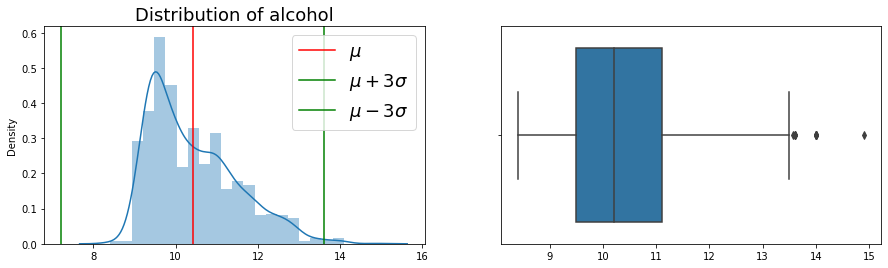

Shapiro-Wilk Test:  Sample does not look Gaussian (reject H0)
Agostino k^2 Test:  Sample does not look Gaussian (reject H0)
column alcohol has 8 values (0.500%) outside interval (7.2260,13.6200)
----------------------------------------


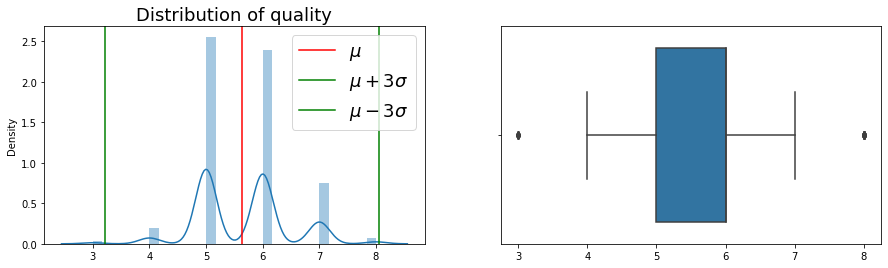

Shapiro-Wilk Test:  Sample does not look Gaussian (reject H0)
Agostino k^2 Test:  Sample does not look Gaussian (reject H0)
column quality has 10 values (0.625%) outside interval (3.2133,8.0587)
----------------------------------------


In [7]:
from scipy.stats import shapiro, normaltest


warnings.filterwarnings("ignore", category=FutureWarning)
separator = 40*'-'


def plot_dist(col,
              lb = None,
              ub = None):
  """ 
  plot distribution and boxplot 
  ------------------------------
  Parameters
    col: column
    lb: float, lower bound for interval
    up: float, upper bound for interval
  ------------------------------
  """ 

  mu = df[[col]].mean()[0]
  sigma = df[[col]].std()[0]

  plt.figure(figsize=(15,4))
  plt.subplot(1,2,1)
  plt.title('Distribution of {}'.format(col), 
            fontsize = 18)
  sns.distplot(df[col].values)
  plt.axvline(x = mu, color = 'red',
              label = r'$\mu$')
  
  if lb is None:
    lb = mu - (3*sigma)
    lb_label = r'$\mu-3\sigma$'
  else: 
    lb_label = '{:.3f}'.format(lb)

  if ub is None:
    ub = mu + (3*sigma)
    ub_label = r'$\mu+ 3\sigma$'
  else: 
    ub_label = '{:.3f}'.format(ub)

  plt.axvline(x = ub, 
              color = 'green',
              label = ub_label)
  plt.axvline(x = lb, 
              color = 'green',
              label = lb_label)
  plt.legend(loc='best',
             fontsize = 18)
  
  plt.subplot(1,2,2)
  sns.boxplot(df[col].values)
  plt.show()

  return (mu - (3*sigma), mu + (3*sigma))

def Normality_test(data,
                   alpha = 0.05,
                   verbose = False,
                   test = 'shapirowilk'):
  """ 
  Shapiro-Wilk normality test or D’Agostino’s K^2 Test
  ------------------------------
  Parameters
    data: dataset
    alpha: float, significance level
  ------------------------------
  """ 

  if test == 'shapirowilk':
    stat, p = shapiro(data)
  elif test == 'dagostino':
    stat, p = normaltest(data)
  else: # non implemented
    return None
  
  if p > alpha:
    result = 'Sample looks Gaussian (fail to reject H0)'
  else:
    result = 'Sample does not look Gaussian (reject H0)'

  if verbose:
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    print(result)
  return result

for col in df.columns:
  interval = plot_dist(col)

  # qtd of values outside [mu - 3 sigma, mu + 3 sigma]
  qtd_outside = len(df[(df[col]<interval[0])|(df[col]>interval[1])][col].values)
  
  # test if distribution is gaussian
  print('Shapiro-Wilk Test: ', Normality_test(df[col].values))
  print('Agostino k^2 Test: ', Normality_test(df[col].values, test = 'dagostino'))

  print('column {} has {} values ({:.3f}%) outside interval ({:.4f},{:.4f})\n{}'.format(
      col, qtd_outside, qtd_outside*100/len(df),
      interval[0], interval[1],
      separator
  ))

Looking at the distributions and the confidence interval $[\bar{X} -3\sigma_X , \bar{X} +3\sigma_X ]$ there doesn't seem to be a large amount of values outside the given confidence interval, for any variable.

Since none of the distributes tested positive for Gaussian Distribution, the confidence interval is not statistically significant, since it used to determine outliers in a normal and non-skewed distribution.


## Interquantile range (IQR)

For non-normally distributed variables, the outlier detection interval can be selected by selecting the upper and lower bounds from quantiles.


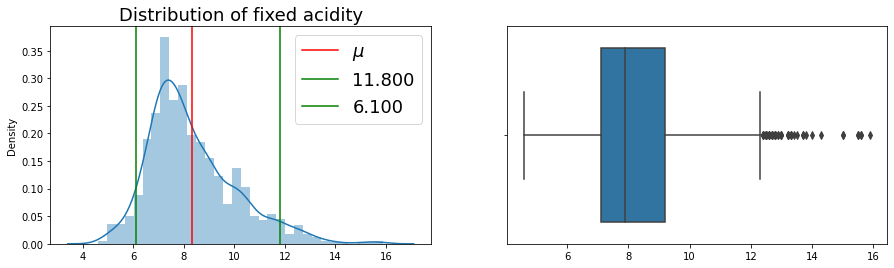

----------------------------------------
column fixed acidity
[0.25, 0.75] - 758 values (47.405%) outside interval (7.1000,9.2000)
[0.10, 0.90] - 302 values (18.887%) outside interval (6.5000,10.7000)
[0.05, 0.95] - 149 values (9.318%) outside interval (6.1000,11.8000)
----------------------------------------


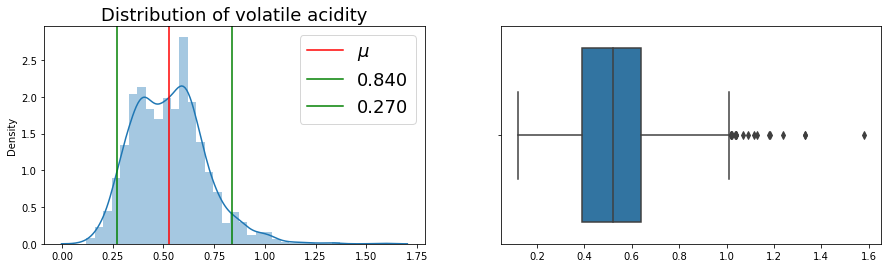

----------------------------------------
column volatile acidity
[0.25, 0.75] - 747 values (46.717%) outside interval (0.3900,0.6400)
[0.10, 0.90] - 303 values (18.949%) outside interval (0.3100,0.7450)
[0.05, 0.95] - 149 values (9.318%) outside interval (0.2700,0.8400)
----------------------------------------


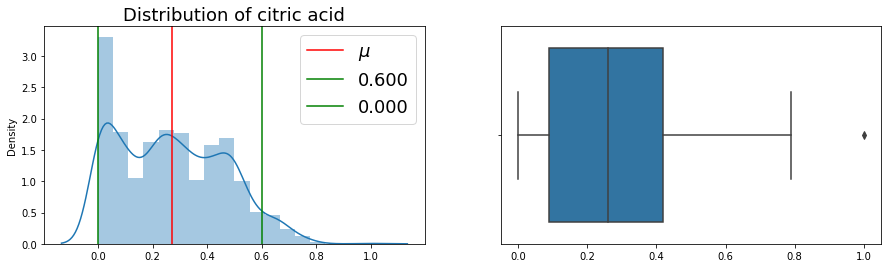

----------------------------------------
column citric acid
[0.25, 0.75] - 771 values (48.218%) outside interval (0.0900,0.4200)
[0.10, 0.90] - 292 values (18.261%) outside interval (0.0100,0.5220)
[0.05, 0.95] - 78 values (4.878%) outside interval (0.0000,0.6000)
----------------------------------------


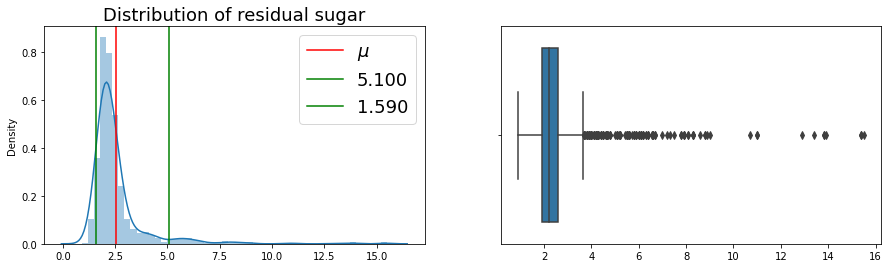

----------------------------------------
column residual sugar
[0.25, 0.75] - 702 values (43.902%) outside interval (1.9000,2.6000)
[0.10, 0.90] - 296 values (18.512%) outside interval (1.7000,3.6000)
[0.05, 0.95] - 159 values (9.944%) outside interval (1.5900,5.1000)
----------------------------------------


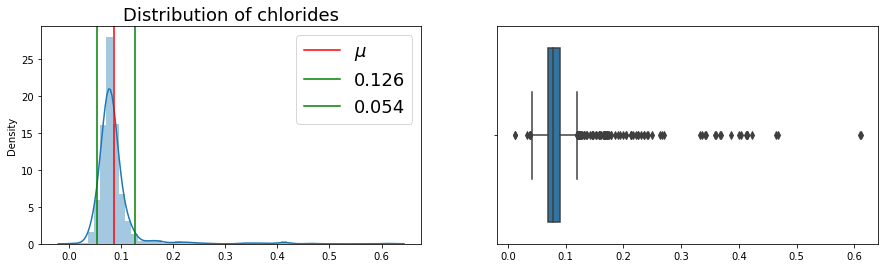

----------------------------------------
column chlorides
[0.25, 0.75] - 771 values (48.218%) outside interval (0.0700,0.0900)
[0.10, 0.90] - 307 values (19.199%) outside interval (0.0600,0.1090)
[0.05, 0.95] - 158 values (9.881%) outside interval (0.0540,0.1261)
----------------------------------------


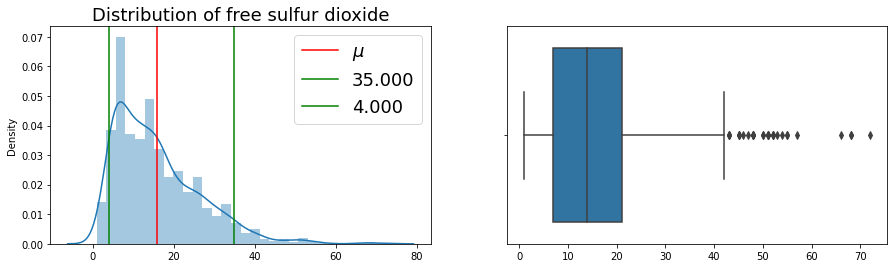

----------------------------------------
column free sulfur dioxide
[0.25, 0.75] - 735 values (45.966%) outside interval (7.0000,21.0000)
[0.10, 0.90] - 237 values (14.822%) outside interval (5.0000,31.0000)
[0.05, 0.95] - 130 values (8.130%) outside interval (4.0000,35.0000)
----------------------------------------


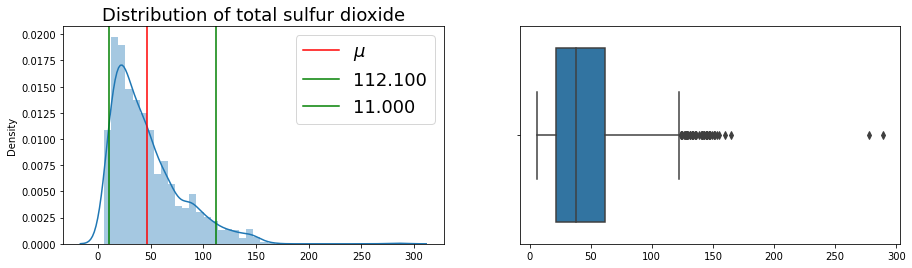

----------------------------------------
column total sulfur dioxide
[0.25, 0.75] - 786 values (49.156%) outside interval (22.0000,62.0000)
[0.10, 0.90] - 305 values (19.074%) outside interval (14.0000,93.2000)
[0.05, 0.95] - 142 values (8.881%) outside interval (11.0000,112.1000)
----------------------------------------


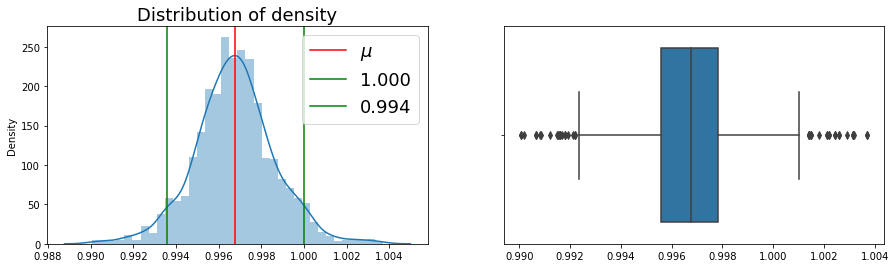

----------------------------------------
column density
[0.25, 0.75] - 793 values (49.593%) outside interval (0.9956,0.9978)
[0.10, 0.90] - 319 values (19.950%) outside interval (0.9946,0.9991)
[0.05, 0.95] - 151 values (9.443%) outside interval (0.9936,1.0000)
----------------------------------------


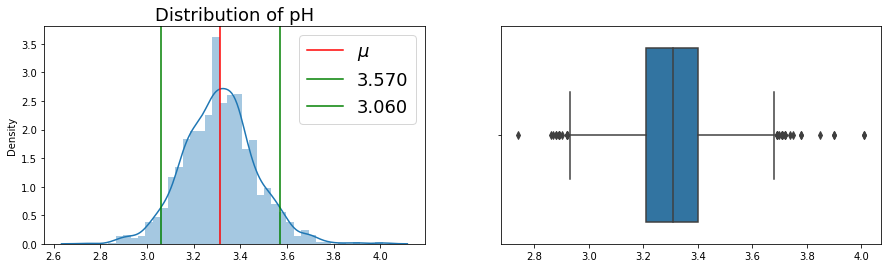

----------------------------------------
column pH
[0.25, 0.75] - 775 values (48.468%) outside interval (3.2100,3.4000)
[0.10, 0.90] - 296 values (18.512%) outside interval (3.1200,3.5100)
[0.05, 0.95] - 145 values (9.068%) outside interval (3.0600,3.5700)
----------------------------------------


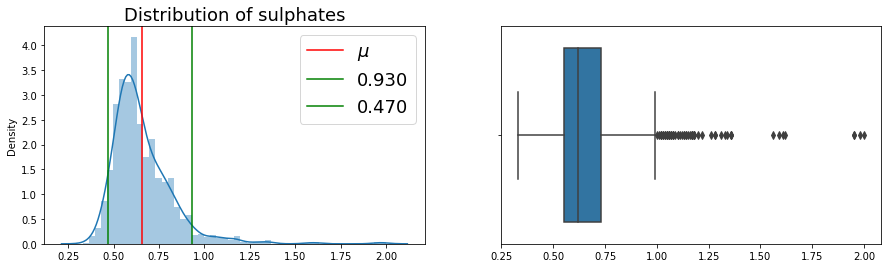

----------------------------------------
column sulphates
[0.25, 0.75] - 756 values (47.280%) outside interval (0.5500,0.7300)
[0.10, 0.90] - 301 values (18.824%) outside interval (0.5000,0.8500)
[0.05, 0.95] - 151 values (9.443%) outside interval (0.4700,0.9300)
----------------------------------------


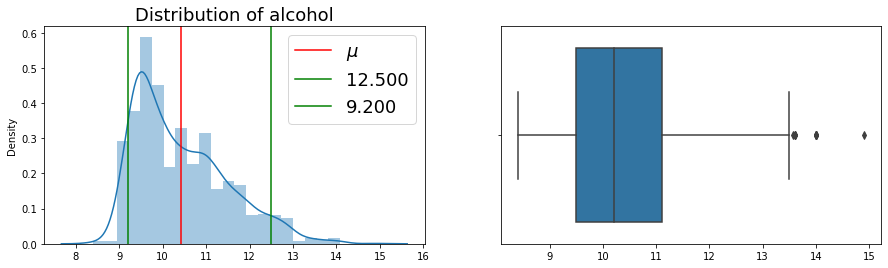

----------------------------------------
column alcohol
[0.25, 0.75] - 677 values (42.339%) outside interval (9.5000,11.1000)
[0.10, 0.90] - 276 values (17.261%) outside interval (9.3000,12.0000)
[0.05, 0.95] - 131 values (8.193%) outside interval (9.2000,12.5000)
----------------------------------------


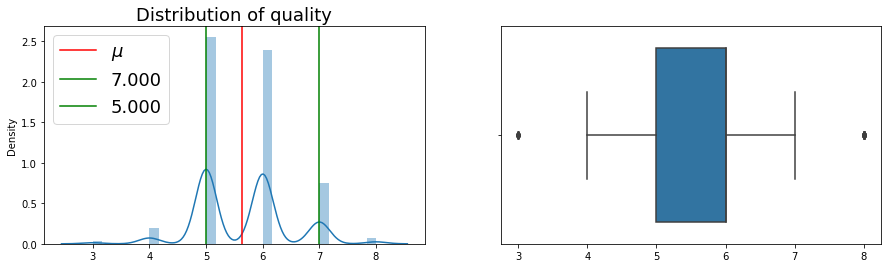

----------------------------------------
column quality
[0.25, 0.75] - 280 values (17.511%) outside interval (5.0000,6.0000)
[0.10, 0.90] - 81 values (5.066%) outside interval (5.0000,7.0000)
[0.05, 0.95] - 81 values (5.066%) outside interval (5.0000,7.0000)
----------------------------------------


In [8]:
for col in df.columns:
  # lower bound
  lb_1 = df[col].quantile(0.25)
  lb_2 = df[col].quantile(0.1)  # more restrictive
  lb_3 = df[col].quantile(0.05) # very restrictive
  
  # upper bound
  ub_1 = df[col].quantile(0.75)
  ub_2 = df[col].quantile(0.9)  # more restrictive
  ub_3 = df[col].quantile(0.95) # very restrictive

  interval = plot_dist(col, 
                       lb = lb_3,
                       ub = ub_3)

  qtd_outside_1 = len(df[(df[col]< lb_1)|(df[col]> ub_1)][col].values)
  qtd_outside_2 = len(df[(df[col]< lb_2)|(df[col]> ub_2)][col].values)
  qtd_outside_3 = len(df[(df[col]< lb_3)|(df[col]> ub_3)][col].values)
  
  print('{}\ncolumn {}'.format(separator, col))
  print('[0.25, 0.75] - {} values ({:.3f}%) outside interval ({:.4f},{:.4f})'.format(
      qtd_outside_1, qtd_outside_1*100/len(df),
      lb_1, ub_1
  ))
  print('[0.10, 0.90] - {} values ({:.3f}%) outside interval ({:.4f},{:.4f})'.format(
      qtd_outside_2, qtd_outside_2*100/len(df),
      lb_2, ub_2
  ))
  print('[0.05, 0.95] - {} values ({:.3f}%) outside interval ({:.4f},{:.4f})'.format(
      qtd_outside_3, qtd_outside_3*100/len(df),
      lb_3, ub_3
  ))
  print(separator)

### Outlier removal

An outlier/anomaly detection algorithm can be performed, since none of the variables are normally distributed (with "easy" outlier detection).

Some possible are:
- Isolation Forest
- SVM
- Local Outlier Factor

https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_anomaly_comparison.html#sphx-glr-auto-examples-miscellaneous-plot-anomaly-comparison-py

In [9]:
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


def test_isolation_forest(df):

  data = df.values
  # split into input and output elements
  X, y = data[:, :-1], data[:, -1]

  # split into train and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                      test_size=0.33, 
                                                      random_state=1)
  
  # summarize the shape of the training dataset
  print(X_train.shape, y_train.shape)

  # identify outliers in the training dataset
  iso = IsolationForest(contamination=0.1)
  yhat = iso.fit_predict(X_train)

  # select all rows that are not outliers
  mask = yhat != -1
  X_train, y_train = X_train[mask, :], y_train[mask]

  # summarize the shape of the updated training dataset
  print(X_train.shape, y_train.shape)

  # fit the model
  model = LinearRegression()
  model.fit(X_train, y_train)

  # evaluate the model
  yhat = model.predict(X_test)

  # evaluate predictions
  mae = mean_absolute_error(y_test, yhat)
  print('MAE: %.3f' % mae)

test_isolation_forest(df)

(1071, 11) (1071,)
(964, 11) (964,)
MAE: 0.502


In [10]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


### Building the target variable



In [11]:
print('labels of quality: {}'.format(set(df['quality'].unique())))

labels of quality: {3, 4, 5, 6, 7, 8}


Since the quality atribute seems to be a discrete variable, non-continuous, with a set of distinct categories, we will build a **multi-label classification model** .

Aldo the dataset only contains the labels {3, 4, 5, 6, 7, 8}, it is possible that there are other non-included labels, for instance if the variable interval was $y_{target} \in [1, 10]$. This could be a case where the dataset was no wines with extremely bad or extremely god qualities.

Since the target variable labels is a sequence with equally distanced values 
\begin{equation}
y_{target} \in \{ 3 + k \}_{k=0}^{5}
\end{equation}
a it is possible that there are no missing labels inside the label interval. So a MinMax approach can be used, in order to transform the labels into a percentage-like interval:
\begin{equation}
\begin{cases}
T_{minmax} : \{ y_k\}_k \to [0,1] \\
y \mapsto y_{minmax} = \frac{y - min\{ y_k\}_k }{max\{ y_k\}_k - min\{ y_k\}_k}
\end{cases}
\end{equation}

Let us check the balance of frequencies of the target variable classes.

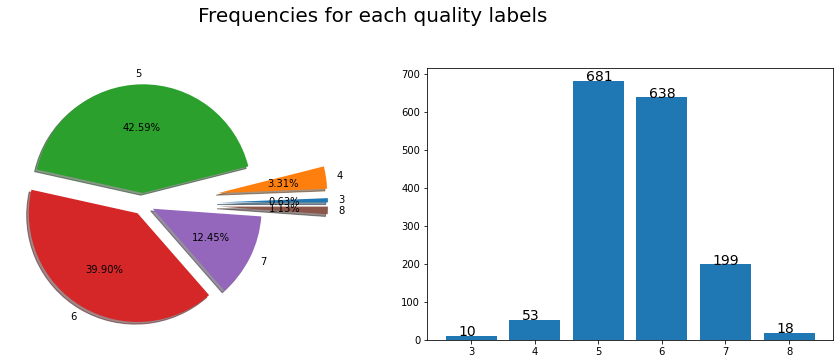

In [12]:
def addlabels(x,y, 
              fontsize = 14):
    for i in range(len(x)):
        plt.text(x[i]-0.2,y[i],y[i],
                 fontsize=fontsize)
  

def label_frequencies(var, 
             explode_size = 0.2,
             explode_list = None):

  labels = list(set(df[var].unique()))
  sizes = list(map(lambda val : len(df[df[var]==val].values),
                   labels))
  N = len(labels)
  if explode_list is None:
    explode_list = tuple([explode_size]* N)

  plt.figure(figsize = (16,5))
  plt.suptitle('Frequencies for each {} labels'.format(var),
               fontsize = 20,
               y = 1.05)
  plt.subplot(1,2,1)
  plt.pie(sizes, explode=explode_list, labels=labels, 
          autopct='%1.2f%%',
          shadow=True, 
          startangle=0)

  plt.subplot(1,2,2)
  plt.bar(labels, sizes)
  addlabels(labels, sizes)
  plt.show()

label_frequencies('quality', 
         explode_list =[0.7, 0.7, 0.1, 
                        0.1, 0.1, 0.7])

We can see that the classes {4,3,8} have frequencies of {53 (3.31%), 10 (0.63%), 18 (1.13%)} (respectively), values very distinct from other dominant classes. So it might be necessary to analyze if this is a **imbalanced classification problem**.

If it is in fact a imbalanced classification, then a few approaches can be tested:
- using an algorithm with weighted classes
- 

## Variable Association


For strictly numerical variables, a level of associated can be measured with the Person correlation, but for discrete-categorical variables, other metrics should can applied:
- Cramer's V
- Phi index



https://www.kaggle.com/chrisbss1/cramer-s-v-correlation-matrix

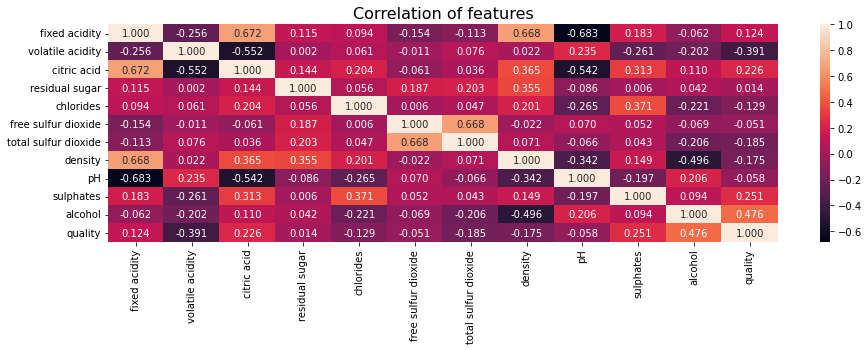

In [52]:
plt.figure(figsize=(15,4))
plt.title('Correlation of features', 
          fontsize = 16)
sns.heatmap(df.corr(),
            annot = True,
            fmt = '.3f')
plt.show()

First, we can plot the data points for each column compared to the target variable.

In [13]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

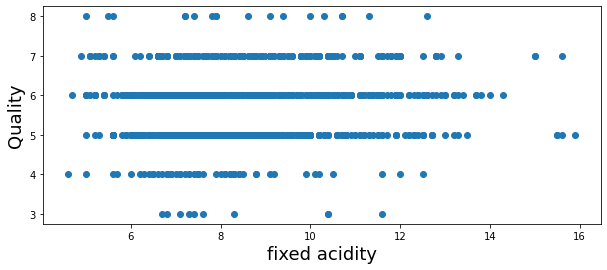

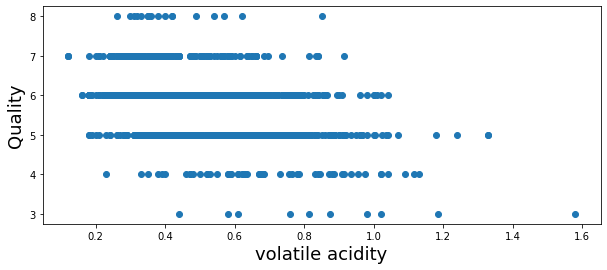

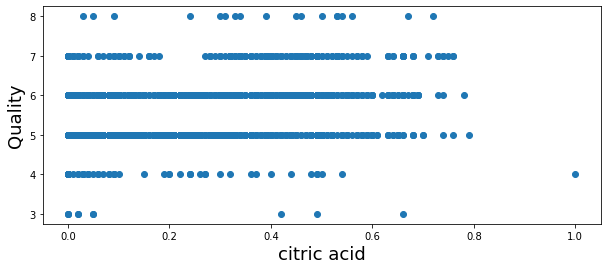

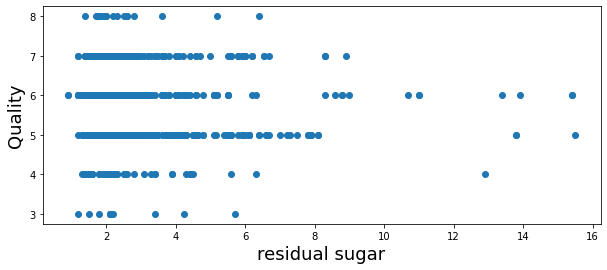

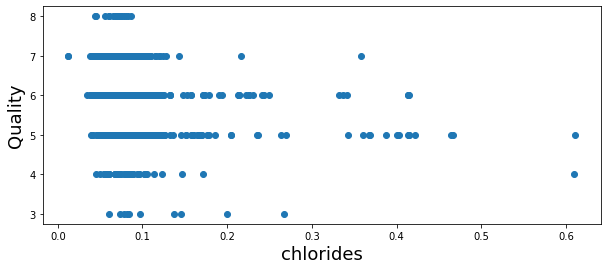

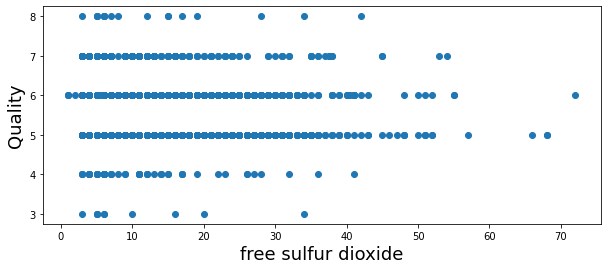

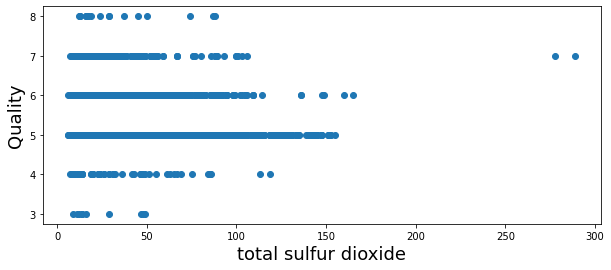

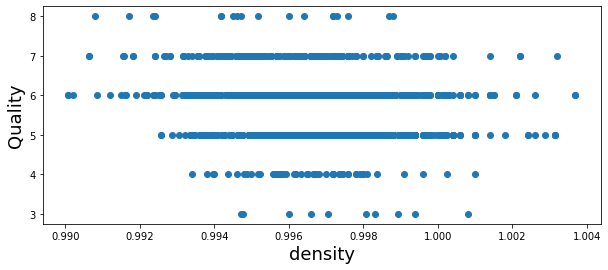

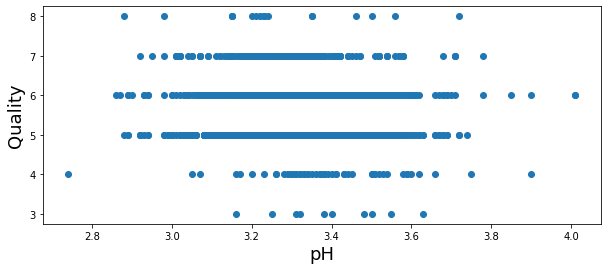

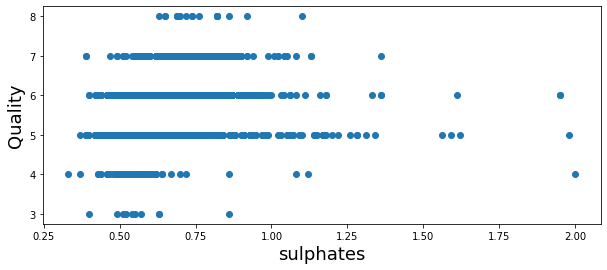

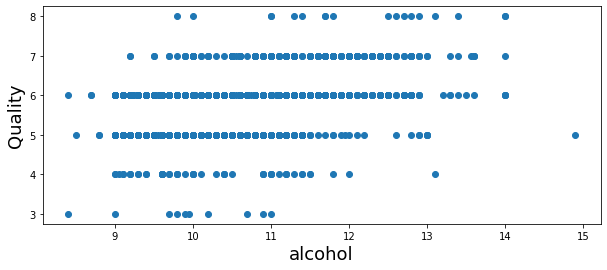

In [14]:
def pair_plots():
  for col in df.columns[:-1]:
    plt.figure(figsize = (10,4))
    plt.scatter(df[col].values,
            df['quality'].values)
    plt.xlabel(col, fontsize = 18)
    plt.ylabel('Quality', fontsize = 18)
    plt.show()

pair_plots()

These plots can help us to visually understand if there is a simple association between the quality of the wine and its features. For example, if the volatile acidity is very high (close to 1.6) we can see that the wine quality is 3. 
Of course, these patterns are not necessarly a rule. 

Then, we will calculate the Cramer's V association index.

In [16]:
from scipy.stats import chi2_contingency

def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

def CramerV_table():
  rows= []
  for var1 in df:
    col = []
    for var2 in df :
      cramers =cramers_V(df[var1], df[var2]) # Cramer's V test
      col.append(round(cramers,6)) # Keeping of the rounded value of the Cramer's V  
    rows.append(col)
    
  cramers_results = np.array(rows)

  return pd.DataFrame(cramers_results, 
                      columns = df.columns, 
                      index = df.columns)
  
association = CramerV_table()

In [17]:
association.style.background_gradient(cmap='coolwarm')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.105859,0.128160,0.093810,0.120410,0.064527,0.100317,0.387256,0.143883,0.072137,0.118222,0.092068
volatile acidity,0.105859,1.000000,0.102385,0.121601,0.120621,0.112588,0.110974,0.327491,0.122874,0.105157,0.116546,0.198776
citric acid,0.128160,0.102385,1.000000,0.101726,0.138816,0.057585,0.113555,0.313884,0.099083,0.096925,0.064502,0.087032
residual sugar,0.093810,0.121601,0.101726,1.000000,0.145263,0.141904,0.162955,0.387149,0.077917,0.066758,0.108884,0.108167
chlorides,0.120410,0.120621,0.138816,0.145263,1.000000,0.164230,0.121588,0.314888,0.160561,0.230292,0.137612,0.167602
free sulfur dioxide,0.064527,0.112588,0.057585,0.141904,0.164230,1.000000,0.254879,0.403557,0.066902,0.079611,0.050676,0.039001
total sulfur dioxide,0.100317,0.110974,0.113555,0.162955,0.121588,0.254879,1.000000,0.325497,0.120540,0.128095,0.101298,0.093634
density,0.387256,0.327491,0.313884,0.387149,0.314888,0.403557,0.325497,1.000000,0.388082,0.277950,0.431912,0.382050
pH,0.143883,0.122874,0.099083,0.077917,0.160561,0.066902,0.120540,0.388082,1.000000,0.113479,0.089317,0.080387
sulphates,0.072137,0.105157,0.096925,0.066758,0.230292,0.079611,0.128095,0.277950,0.113479,1.000000,0.069629,0.115795


In [18]:
association[['quality']].sort_values(by=['quality'],
                                    ascending = False).style.background_gradient(
                                        cmap='coolwarm')

,quality
quality,1.000000
density,0.382050
volatile acidity,0.198776
chlorides,0.167602
alcohol,0.140653
sulphates,0.115795
residual sugar,0.108167
total sulfur dioxide,0.093634
fixed acidity,0.092068
citric acid,0.087032


From the Cramer's V associability index, the variable most associated to quality is density, but there are no significantly strong associations.

## Model Building

We will test a set of models with different algorithmic approaches in order to try to amplify the range of use-cases.

- Random Forest Classifier (Tree-based model with Bagging/Bootstrap Aggregating)
- Logist Regressor (fast, simpler)
- Support Vector Classifier (slow, usually good for large datasets, Kernel-based method, with possible non-linear kernels)
- Naive-Bayes (fast, simpler)
- Neural Nets (slow, usually good for large datasets, low interpretability)
- KNN (simpler, fast usually high bias/low variance)
- Decision Tree (simpler, fast usually high bias/low variance)

Some parameters can be used to determine which algorithms to use:
- size of the dataset
- interpretability of the model
- computational cost; algorithm complexity
- linearity/non-linearity
- number of features

### train-test-split

In order to be able to evaluate the model, predictions must be compared with actual values with a given metric. For instance with a Loss metric $J$:
\begin{equation}
J: \mathbb{R}^2 \to \mathbb{R} \\
performance_J = J(y, \hat{y})
\end{equation}

To do so, the data is divided into training set (used to train the model) and test set (used to compare with predictions), usually with a larger proportion for the training set.

Given a dataset $X$ with size $N_X$, let us say we'll split the dataset with proportion $p$, such that $p > (1-p)$ and $p \in (0,1)$:

\begin{equation}
N_{train} \approx  p N_x , \quad N_{test} \approx (1-p)N_X 
\\
\Rightarrow N_{train} + N_{test} = N_X
\\
X_{train} = \{ X_j \}_{j=1}^{N_{train}} \\
X_{test} = \{ X_j \}_{j=N_{train}+1}^{N_X} = \{ X_j \}_{j=N_X-N_{test}}^{N_X}
\end{equation}

In [19]:
features = list(df.columns[:-1])
target = ['quality']
X = df[features].values #feature matrix
y = df[target].values #target


def get_traintest_data(
    X,y,
    test_size=0.3, random_state=42, 
    df=df, 
    vars=features, 
    target='quality'
  ):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
  return X_train, X_test, y_train, y_test 

X_train, X_test, y_train, y_test  = get_traintest_data(X,y)

### Apply models

In [20]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, recall_score, precision_score, f1_score

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

def test_model(X_train, X_test, y_train, y_test,
               estimator):
  estimator.fit(X_train, y_train)
  y_pred = estimator.predict(X_test)
  return y_pred

def apply_models(
    X_train, X_test, y_train, y_test,
    estimators,
    random_state=42
  ):
  average = 'macro'
  d = {
      'model': [],
      'classifier': [],
      'accuracy': [],
      'precision': [],
      'recall': [],
      'f1': [],
      'report': [],
      'confusion_matrix': [],
      'exception':[]
  }
  c=0
  N = len(list(estimators.keys()))

  for k in list(estimators.keys()):
    
    clf = estimators[k]

    c+=1
    print('({:.3f}%) ({}/{}) {}'.format(
        c*100/N, c, N, k
    ))

    try:
      y_pred = test_model(X_train, X_test, y_train, y_test,
                clf)

      report = classification_report(y_test, y_pred, 
                                  target_names=[str(x) for x in target_names])

      d['accuracy'].append(accuracy_score(y_test, y_pred))
      d['precision'].append(precision_score(y_test, y_pred, 
                                            average=average))
      d['recall'].append(recall_score(y_test, y_pred, 
                                      average=average))
      d['f1'].append(f1_score(y_test, y_pred, average=average))
      d['report'].append(report)
      d['confusion_matrix'].append(confusion_matrix(y_test, y_pred))
      d['exception'].append(np.nan)  

    except Exception as e:
      d['accuracy'].append(np.nan)
      d['precision'].append(np.nan)
      d['recall'].append(np.nan)
      d['f1'].append(np.nan)
      d['report'].append(np.nan)
      d['confusion_matrix'].append(np.nan)
      d['exception'].append(e)

    d['model'].append(clf)
    d['classifier'].append(k)


  classifiers_results = pd.DataFrame(d)
  classifiers_results.sort_values(by=['accuracy',
                      'precision',
                      'recall',
                      'f1'], 
                  ascending = False,
                  inplace = True)

  classifiers_results.reset_index(drop=True,
                  inplace = True)
  return classifiers_results
#--------------------------------------------------------------

target_names = list(df['quality'].unique())
random_state = 42


estimators = {
      'SVC_rbf': svm.SVC(kernel='rbf', C=1, random_state=random_state),
      'SVC_sigmoid': svm.SVC(kernel='sigmoid', C=1, random_state=random_state),
      'RF': RandomForestClassifier(random_state=random_state),
      'RF_weighted': RandomForestClassifier(random_state=random_state,
                             class_weight='balanced'),
      'LR': LogisticRegression(random_state=random_state),
      'NB_gaussian': GaussianNB(),
      'NB_Multinomial': MultinomialNB(),
      'DecisionTree': tree.DecisionTreeClassifier(random_state=random_state),
      'KNN_3': KNeighborsClassifier(n_neighbors=3),
      'KNN_5': KNeighborsClassifier(n_neighbors=5)
}

  
clf_res = apply_models(X_train, X_test, y_train, y_test,
                       estimators=estimators)

(10.000%) (1/10) SVC_rbf


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and

(20.000%) (2/10) SVC_sigmoid


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

(30.000%) (3/10) RF


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

(40.000%) (4/10) RF_weighted


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

(50.000%) (5/10) LR


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0

(60.000%) (6/10) NB_gaussian
(70.000%) (7/10) NB_Multinomial
(80.000%) (8/10) DecisionTree
(90.000%) (9/10) KNN_3
(100.000%) (10/10) KNN_5


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [21]:
clf_res

,model,classifier,accuracy,precision,recall,f1,report,confusion_matrix,exception
0,"(DecisionTreeClassifier(max_features='auto', r...",RF_weighted,0.664583,0.484405,0.349195,0.366150,precision recall f1-score ...,"[[0, 0, 1, 0, 0, 0], [0, 0, 10, 7, 0, 0], [0, ...",NaN
1,"(DecisionTreeClassifier(max_features='auto', r...",RF,0.654167,0.399318,0.344922,0.356998,precision recall f1-score ...,"[[0, 0, 1, 0, 0, 0], [0, 0, 11, 6, 0, 0], [0, ...",NaN
2,DecisionTreeClassifier(random_state=42),DecisionTree,0.572917,0.347317,0.317146,0.327368,precision recall f1-score ...,"[[0, 0, 1, 0, 0, 0], [0, 1, 10, 5, 1, 0], [1, ...",NaN
3,LogisticRegression(random_state=42),LR,0.543750,0.224173,0.222369,0.204478,precision recall f1-score ...,"[[0, 0, 1, 0, 0, 0], [0, 0, 11, 6, 0, 0], [0, ...",NaN
4,GaussianNB(),NB_gaussian,0.541667,0.285929,0.294161,0.289046,precision recall f1-score ...,"[[0, 0, 1, 0, 0, 0], [1, 2, 8, 6, 0, 0], [0, 6...",NaN
5,"SVC(C=1, random_state=42)",SVC_rbf,0.504167,0.341677,0.205681,0.189057,precision recall f1-score ...,"[[0, 0, 0, 1, 0, 0], [0, 0, 3, 14, 0, 0], [0, ...",NaN
6,MultinomialNB(),NB_Multinomial,0.495833,0.241249,0.266953,0.243344,precision recall f1-score ...,"[[0, 0, 0, 0, 1, 0], [1, 0, 3, 5, 8, 0], [2, 0...",NaN
7,KNeighborsClassifier(),KNN_5,0.485417,0.263860,0.222920,0.225714,precision recall f1-score ...,"[[0, 0, 1, 0, 0, 0], [0, 1, 7, 9, 0, 0], [0, 1...",NaN
8,KNeighborsClassifier(n_neighbors=3),KNN_3,0.447917,0.234146,0.228091,0.226870,precision recall f1-score ...,"[[0, 0, 1, 0, 0, 0], [0, 2, 4, 10, 1, 0], [1, ...",NaN
9,"SVC(C=1, kernel='sigmoid', random_state=42)",SVC_sigmoid,0.327083,0.116869,0.132671,0.123739,precision recall f1-score ...,"[[0, 0, 0, 1, 0, 0], [0, 0, 8, 9, 0, 0], [0, 2...",NaN


## Imbalanced Learning

As expected, the problem is a Imbalanced Learning problem, because the best algorithm was the Random Forest with weighted sampling, and most of the algorithms performed poorly.

In order to attack this problem, we will try to use specifically imbalanced learning technicques.


In [22]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

data = df.values
X = data[:, :-1]
y = data[:, -1]

# summarize class distribution
counter = Counter(y)
print(counter)


Counter({5.0: 681, 6.0: 638, 7.0: 199, 4.0: 53, 8.0: 18, 3.0: 10})


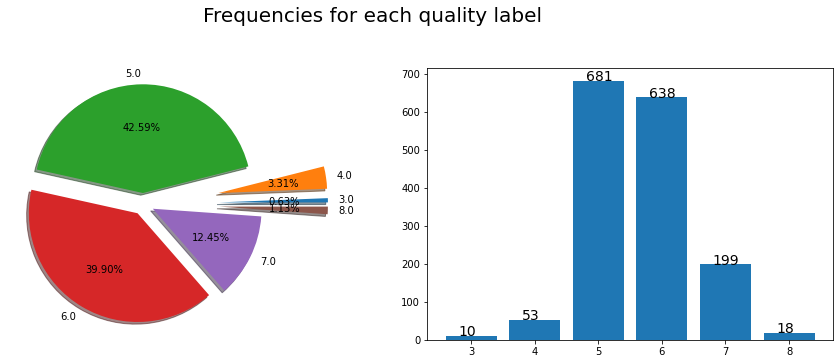

In [23]:
def label_frequencies2(vals, 
             explode_size = 0.2,
             explode_list = None):

  labels = list(set(vals))
  sizes = list(map(lambda val : list(vals).count(val),
                   labels))
  N = len(labels)
  if explode_list is None:
    explode_list = tuple([explode_size]* N)

  plt.figure(figsize = (16,5))
  plt.suptitle('Frequencies for each quality label',
               fontsize = 20,
               y = 1.05)
  plt.subplot(1,2,1)
  plt.pie(sizes, explode=explode_list, labels=labels, 
          autopct='%1.2f%%',
          shadow=True, 
          startangle=0)

  plt.subplot(1,2,2)
  plt.bar(labels, sizes)
  addlabels(labels, sizes)
  plt.show()

label_frequencies2(y, 
         explode_list =[0.7, 0.7, 0.1, 
                        0.1, 0.1, 0.7])

### Undersampling

Counter({5.0: 681, 6.0: 638, 7.0: 199, 4.0: 53, 8.0: 18, 3.0: 10})


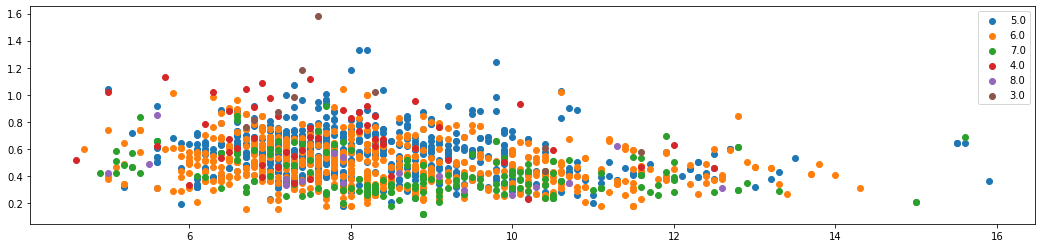

In [24]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

data = df.values
X = data[:, :-1]
y = data[:, -1]

# summarize class distribution
counter = Counter(y)
print(counter)

# scatter plot of examples by class label
plt.figure(figsize=(18,4))

for label, _ in counter.items():
	row_ix = np.where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

Counter({5.0: 681, 6.0: 638, 7.0: 199, 4.0: 53, 8.0: 18, 3.0: 10})


/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number of samples (700) in class 5.0 will be larger than the number of samples in the majority class (class #5.0 -> 681)
  f"After over-sampling, the number of samples ({n_samples})"
/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number of samples (700) in class 6.0 will be larger than the number of samples in the majority class (class #5.0 -> 681)
  f"After over-sampling, the number of samples ({n_samples})"
/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the number of samples (700) in class 7.0 will be larger than the number of samples in the majority class (class #5.0 -> 681)
  f"After over-sampling, the number of samples ({n_samples})"
/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:300: UserWarning: After over-sampling, the num

Counter({3.0: 100, 4.0: 100, 5.0: 100, 6.0: 100, 7.0: 100, 8.0: 100})


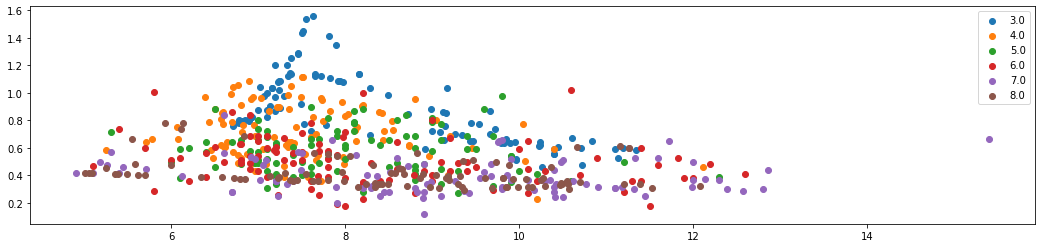

In [25]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

data = df.values
X = data[:, :-1]
y = data[:, -1]

# summarize class distribution
counter = Counter(y)
print(counter)

# define pipeline
over = SMOTE(sampling_strategy={5.0:700,
                                6.0:700,
                                7.0:700,
                                4.0:700,
                                8.0:700,
                                3.0:700})
under = RandomUnderSampler(sampling_strategy={5.0:100,
                                6.0:100,
                                7.0:100,
                                4.0:100,
                                8.0:100,
                                3.0:100})
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X, y = pipeline.fit_resample(X, y)

# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
plt.figure(figsize=(18,4))
for label, _ in counter.items():
	row_ix = np.where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

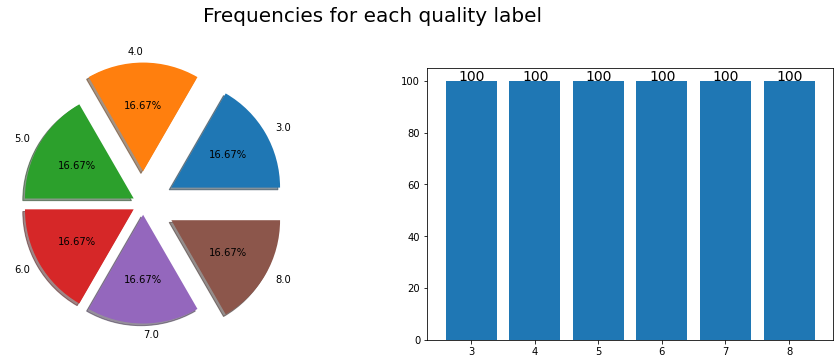

In [26]:
label_frequencies2(y, 
         explode_list =[0.3, 0.3, 0.1, 
                        0.1, 0.1, 0.3])

In [27]:
X_train, X_test, y_train, y_test  = get_traintest_data(X,y)

clf_res = apply_models(X_train, X_test, y_train, y_test,
                       estimators=estimators)

(10.000%) (1/10) SVC_rbf
(20.000%) (2/10) SVC_sigmoid
(30.000%) (3/10) RF


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

(40.000%) (4/10) RF_weighted
(50.000%) (5/10) LR
(60.000%) (6/10) NB_gaussian
(70.000%) (7/10) NB_Multinomial
(80.000%) (8/10) DecisionTree
(90.000%) (9/10) KNN_3
(100.000%) (10/10) KNN_5


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [28]:
clf_res

,model,classifier,accuracy,precision,recall,f1,report,confusion_matrix,exception
0,"(DecisionTreeClassifier(max_features='auto', r...",RF,0.700000,0.664491,0.669290,0.663692,precision recall f1-score ...,"[[35, 3, 0, 0, 0, 0], [3, 21, 6, 1, 0, 0], [4,...",NaN
1,"(DecisionTreeClassifier(max_features='auto', r...",RF_weighted,0.677778,0.645006,0.648088,0.644977,precision recall f1-score ...,"[[34, 4, 0, 0, 0, 0], [3, 20, 8, 0, 0, 0], [3,...",NaN
2,DecisionTreeClassifier(random_state=42),DecisionTree,0.611111,0.601086,0.588596,0.591008,precision recall f1-score ...,"[[33, 5, 0, 0, 0, 0], [6, 16, 5, 3, 1, 0], [3,...",NaN
3,GaussianNB(),NB_gaussian,0.550000,0.487691,0.515673,0.497169,precision recall f1-score ...,"[[28, 5, 0, 5, 0, 0], [2, 22, 7, 0, 0, 0], [4,...",NaN
4,KNeighborsClassifier(n_neighbors=3),KNN_3,0.500000,0.467187,0.472755,0.466214,precision recall f1-score ...,"[[25, 5, 4, 1, 3, 0], [5, 17, 6, 1, 2, 0], [5,...",NaN
5,LogisticRegression(random_state=42),LR,0.494444,0.470546,0.468924,0.467066,precision recall f1-score ...,"[[24, 6, 3, 5, 0, 0], [3, 17, 7, 2, 2, 0], [2,...",NaN
6,KNeighborsClassifier(),KNN_5,0.427778,0.394089,0.403020,0.396859,precision recall f1-score ...,"[[23, 6, 3, 2, 3, 1], [5, 14, 4, 3, 2, 3], [5,...",NaN
7,"SVC(C=1, random_state=42)",SVC_rbf,0.322222,0.244636,0.307967,0.243412,precision recall f1-score ...,"[[27, 0, 0, 11, 0, 0], [16, 0, 6, 9, 0, 0], [8...",NaN
8,MultinomialNB(),NB_Multinomial,0.283333,0.247285,0.257113,0.211701,precision recall f1-score ...,"[[27, 0, 1, 5, 4, 1], [16, 2, 8, 4, 0, 1], [6,...",NaN
9,"SVC(C=1, kernel='sigmoid', random_state=42)",SVC_sigmoid,0.200000,0.157318,0.190242,0.139464,precision recall f1-score ...,"[[19, 0, 13, 6, 0, 0], [20, 1, 7, 3, 0, 0], [1...",NaN


### Oversampling

Counter({5.0: 681, 6.0: 638, 7.0: 199, 4.0: 53, 8.0: 18, 3.0: 10})
Counter({5.0: 681, 6.0: 681, 7.0: 681, 4.0: 290, 8.0: 259, 3.0: 234})


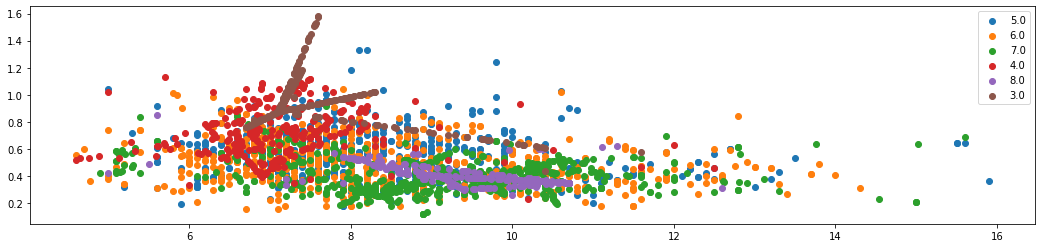

In [29]:
# borderline-SMOTE with SVM for imbalanced dataset
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SVMSMOTE

# define dataset
data = df.values
X = data[:, :-1]
y = data[:, -1]

# summarize class distribution
counter = Counter(y)
print(counter)

# transform the dataset
oversample = SVMSMOTE()
X, y = oversample.fit_resample(X, y)

# summarize the new class distribution
counter = Counter(y)
print(counter)

# scatter plot of examples by class label
plt.figure(figsize=(18,4))

for label, _ in counter.items():
	row_ix = np.where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
plt.legend()
plt.show()

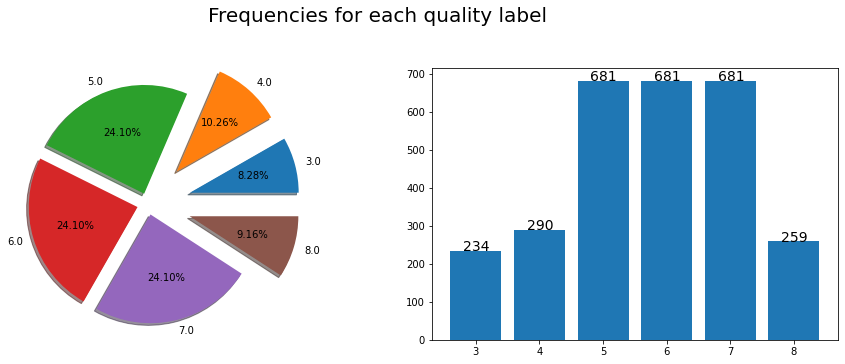

In [30]:
label_frequencies2(y, 
         explode_list =[0.4, 0.4, 0.1, 
                        0.1, 0.1, 0.4])

In [31]:
X_train, X_test, y_train, y_test  = get_traintest_data(X,y)

clf_res = apply_models(X_train, X_test, y_train, y_test,
                       estimators=estimators)

(10.000%) (1/10) SVC_rbf
(20.000%) (2/10) SVC_sigmoid
(30.000%) (3/10) RF
(40.000%) (4/10) RF_weighted
(50.000%) (5/10) LR
(60.000%) (6/10) NB_gaussian
(70.000%) (7/10) NB_Multinomial
(80.000%) (8/10) DecisionTree
(90.000%) (9/10) KNN_3
(100.000%) (10/10) KNN_5


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [32]:
clf_res

,model,classifier,accuracy,precision,recall,f1,report,confusion_matrix,exception
0,"(DecisionTreeClassifier(max_features='auto', r...",RF,0.806604,0.858257,0.845355,0.850546,precision recall f1-score ...,"[[62, 2, 1, 0, 0, 0], [0, 71, 7, 2, 0, 0], [0,...",NaN
1,"(DecisionTreeClassifier(max_features='auto', r...",RF_weighted,0.799528,0.843160,0.838878,0.838830,precision recall f1-score ...,"[[61, 3, 1, 0, 0, 0], [0, 71, 7, 2, 0, 0], [0,...",NaN
2,DecisionTreeClassifier(random_state=42),DecisionTree,0.742925,0.778260,0.784207,0.780465,precision recall f1-score ...,"[[61, 3, 0, 1, 0, 0], [1, 59, 11, 7, 2, 0], [3...",NaN
3,KNeighborsClassifier(n_neighbors=3),KNN_3,0.718160,0.764619,0.782940,0.771140,precision recall f1-score ...,"[[62, 2, 0, 1, 0, 0], [0, 70, 7, 2, 1, 0], [1,...",NaN
4,KNeighborsClassifier(),KNN_5,0.688679,0.736370,0.760048,0.746491,precision recall f1-score ...,"[[62, 2, 0, 1, 0, 0], [1, 68, 5, 5, 1, 0], [1,...",NaN
5,GaussianNB(),NB_gaussian,0.542453,0.562451,0.630752,0.568164,precision recall f1-score ...,"[[49, 3, 13, 0, 0, 0], [8, 64, 4, 4, 0, 0], [3...",NaN
6,LogisticRegression(random_state=42),LR,0.496462,0.454338,0.487264,0.462149,precision recall f1-score ...,"[[44, 8, 13, 0, 0, 0], [0, 51, 22, 5, 1, 1], [...",NaN
7,"SVC(C=1, random_state=42)",SVC_rbf,0.474057,0.464125,0.455909,0.441657,precision recall f1-score ...,"[[53, 4, 0, 1, 7, 0], [7, 28, 12, 16, 17, 0], ...",NaN
8,"SVC(C=1, kernel='sigmoid', random_state=42)",SVC_sigmoid,0.207547,0.202806,0.218603,0.168018,precision recall f1-score ...,"[[41, 0, 23, 0, 1, 0], [32, 0, 31, 4, 10, 3], ...",NaN
9,MultinomialNB(),NB_Multinomial,NaN,NaN,NaN,NaN,NaN,NaN,Negative values in data passed to MultinomialN...


In [34]:
from collections import Counter

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from imblearn.datasets import make_imbalance
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import make_pipeline
from imblearn.metrics import classification_report_imbalanced

target = 'quality'
features = list(df.columns[:-1])


def imbalanced_classifier(
    classifier=RandomForestClassifier(class_weight='balanced', random_state=42),
    RANDOM_STATE = 42,
    sampling_strategy={'low': 30, 'med': 35, 'high': 35}
):

  # Create a folder to fetch the dataset
  X, y = make_imbalance(
      df[features].values,
      df[target].values,
      sampling_strategy=sampling_strategy,
      random_state=RANDOM_STATE,
  )

  X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE)

  print(f"Training target statistics: {Counter(y_train)}")
  print(f"Testing target statistics: {Counter(y_test)}")

  # Create a pipeline
  pipeline = make_pipeline(
      NearMiss(version=2), StandardScaler(), classifier
  )
  pipeline.fit(X_train, y_train)

  # Classify and report the results
  print(classification_report_imbalanced(y_test, pipeline.predict(X_test)))

  return classification_report_imbalanced(y_test, pipeline.predict(X_test))

report = imbalanced_classifier(
    sampling_strategy = {
                          5.0:600,
                          6.0:600,
                          7.0:150,
                          4.0:50,
                          8.0:15,
                          3.0:8
    }
)

Training target statistics: Counter({5: 447, 6: 446, 7: 119, 4: 38, 8: 9, 3: 8})
Testing target statistics: Counter({6: 154, 5: 153, 7: 31, 4: 12, 8: 6})
                   pre       rec       spe        f1       geo       iba       sup

          3       0.00      0.00      0.89      0.00      0.00      0.00         0
          4       0.04      0.17      0.87      0.07      0.38      0.13        12
          5       0.60      0.27      0.87      0.37      0.48      0.22       153
          6       0.42      0.27      0.71      0.33      0.44      0.19       154
          7       0.13      0.10      0.94      0.11      0.30      0.08        31
          8       0.06      0.83      0.79      0.12      0.81      0.66         6

avg / total       0.45      0.26      0.81      0.32      0.45      0.20       356



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Sensitivity is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarn

## Data pre-processing (scaling)
Let us now use the oversampling method with scalers

In [35]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# getting feature matrix and target vector
features = list(df.columns[:-1])
target = ['quality']
X = df[features].values #feature matrix
y = df[target].values #target

# apply oversampling
oversample = SVMSMOTE()
X, y = oversample.fit_resample(X, y)

# set scalers
scaler1 = StandardScaler()
scaler2 = MinMaxScaler()

# apply scalers
X_std = scaler1.fit_transform(X)
X_minmax = scaler2.fit_transform(X)

# get train-test-split
X_train_std, X_test_std, y_train, y_test  = get_traintest_data(X_std,
                                                               y)
X_train_minmax, X_test_minmax, y_train, y_test  = get_traintest_data(X_minmax,
                                                                     y)


estimators2 = estimators.copy()
estimators2.update({
    'RF_balanced_subsample': RandomForestClassifier(class_weight='balanced_subsample', 
                                                    random_state=42),
    'RF_balanced_subsample_200est': RandomForestClassifier(class_weight='balanced_subsample', 
                                                    random_state=42,
                                                    n_estimators=200),
    'RF_balanced_200est': RandomForestClassifier(class_weight='balanced', 
                                                    random_state=42,
                                                    n_estimators=200),
})

# standard scaler results
clf_res_std = apply_models(X_train_std, 
                              X_test_std, 
                              y_train, 
                              y_test,
                       estimators=estimators2)
# minmax scaler results
clf_res_minmax = apply_models(X_train_minmax, 
                              X_test_minmax, 
                              y_train, 
                              y_test,
                       estimators=estimators2)

(7.692%) (1/13) SVC_rbf
(15.385%) (2/13) SVC_sigmoid
(23.077%) (3/13) RF
(30.769%) (4/13) RF_weighted
(38.462%) (5/13) LR
(46.154%) (6/13) NB_gaussian
(53.846%) (7/13) NB_Multinomial


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


(61.538%) (8/13) DecisionTree
(69.231%) (9/13) KNN_3
(76.923%) (10/13) KNN_5
(84.615%) (11/13) RF_balanced_subsample
(92.308%) (12/13) RF_balanced_subsample_200est
(100.000%) (13/13) RF_balanced_200est
(7.692%) (1/13) SVC_rbf
(15.385%) (2/13) SVC_sigmoid


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

(23.077%) (3/13) RF
(30.769%) (4/13) RF_weighted
(38.462%) (5/13) LR
(46.154%) (6/13) NB_gaussian
(53.846%) (7/13) NB_Multinomial


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0

(61.538%) (8/13) DecisionTree
(69.231%) (9/13) KNN_3
(76.923%) (10/13) KNN_5
(84.615%) (11/13) RF_balanced_subsample
(92.308%) (12/13) RF_balanced_subsample_200est
(100.000%) (13/13) RF_balanced_200est


In [36]:
clf_res_std[clf_res_std['accuracy']>=0.75]

,model,classifier,accuracy,precision,recall,f1,report,confusion_matrix,exception
0,"(DecisionTreeClassifier(max_features='auto', r...",RF_weighted,0.823906,0.852674,0.857818,0.853464,precision recall f1-score ...,"[[67, 0, 0, 0, 0, 0], [1, 83, 8, 3, 0, 0], [1,...",NaN
1,"(DecisionTreeClassifier(max_features='auto', r...",RF_balanced_subsample_200est,0.822839,0.853905,0.856989,0.853088,precision recall f1-score ...,"[[67, 0, 0, 0, 0, 0], [1, 83, 7, 4, 0, 0], [1,...",NaN
2,"(DecisionTreeClassifier(max_features='auto', r...",RF_balanced_200est,0.819637,0.850007,0.855613,0.850633,precision recall f1-score ...,"[[67, 0, 0, 0, 0, 0], [1, 84, 7, 3, 0, 0], [1,...",NaN
3,"(DecisionTreeClassifier(max_features='auto', r...",RF_balanced_subsample,0.819637,0.849778,0.854619,0.849924,precision recall f1-score ...,"[[67, 0, 0, 0, 0, 0], [1, 83, 8, 3, 0, 0], [1,...",NaN
4,"(DecisionTreeClassifier(max_features='auto', r...",RF,0.816435,0.848766,0.853174,0.848851,precision recall f1-score ...,"[[67, 0, 0, 0, 0, 0], [1, 84, 6, 4, 0, 0], [2,...",NaN
5,KNeighborsClassifier(n_neighbors=3),KNN_3,0.751334,0.767070,0.807878,0.782621,precision recall f1-score ...,"[[67, 0, 0, 0, 0, 0], [2, 87, 4, 2, 0, 0], [3,...",NaN
6,"SVC(C=1, random_state=42)",SVC_rbf,0.750267,0.774111,0.795141,0.780808,precision recall f1-score ...,"[[63, 4, 0, 0, 0, 0], [0, 82, 9, 4, 0, 0], [2,...",NaN


The models with data pre-processing had better performance, and that might indicate that scaling the data into a fixed distribution can increase data balance.

In [38]:
clf_res_std[clf_res_std['classifier']=='RF']['model'].values[0].__dict__

{'base_estimator': DecisionTreeClassifier(),
 'base_estimator_': DecisionTreeClassifier(),
 'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'classes_': array([3, 4, 5, 6, 7, 8]),
 'criterion': 'gini',
 'estimator_params': ('criterion',
  'max_depth',
  'min_samples_split',
  'min_samples_leaf',
  'min_weight_fraction_leaf',
  'max_features',
  'max_leaf_nodes',
  'min_impurity_decrease',
  'random_state',
  'ccp_alpha'),
 'estimators_': [DecisionTreeClassifier(max_features='auto', random_state=1608637542),
  DecisionTreeClassifier(max_features='auto', random_state=1273642419),
  DecisionTreeClassifier(max_features='auto', random_state=1935803228),
  DecisionTreeClassifier(max_features='auto', random_state=787846414),
  DecisionTreeClassifier(max_features='auto', random_state=996406378),
  DecisionTreeClassifier(max_features='auto', random_state=1201263687),
  DecisionTreeClassifier(max_features='auto', random_state=423734972),
  DecisionTreeClassifier(max_features='auto',

In [39]:
clf_res_minmax[clf_res_minmax['accuracy']>=0.75]

,model,classifier,accuracy,precision,recall,f1,report,confusion_matrix,exception
0,"(DecisionTreeClassifier(max_features='auto', r...",RF_balanced_200est,0.823906,0.853292,0.857851,0.853313,precision recall f1-score ...,"[[67, 0, 0, 0, 0, 0], [1, 83, 8, 3, 0, 0], [1,...",NaN
1,"(DecisionTreeClassifier(max_features='auto', r...",RF_balanced_subsample,0.820704,0.852698,0.855447,0.851608,precision recall f1-score ...,"[[67, 0, 0, 0, 0, 0], [1, 83, 8, 3, 0, 0], [1,...",NaN
2,"(DecisionTreeClassifier(max_features='auto', r...",RF_balanced_subsample_200est,0.819637,0.851377,0.854630,0.850567,precision recall f1-score ...,"[[67, 0, 0, 0, 0, 0], [1, 83, 7, 4, 0, 0], [1,...",NaN
3,"(DecisionTreeClassifier(max_features='auto', r...",RF_weighted,0.819637,0.848702,0.854642,0.849932,precision recall f1-score ...,"[[67, 0, 0, 0, 0, 0], [1, 83, 8, 3, 0, 0], [1,...",NaN
4,"(DecisionTreeClassifier(max_features='auto', r...",RF,0.816435,0.848866,0.852202,0.848524,precision recall f1-score ...,"[[67, 0, 0, 0, 0, 0], [1, 83, 6, 5, 0, 0], [2,...",NaN


In [40]:
print(SVMSMOTE.__doc__)

Over-sampling using SVM-SMOTE.

    Variant of SMOTE algorithm which use an SVM algorithm to detect sample to
    use for generating new synthetic samples as proposed in [2]_.

    Read more in the :ref:`User Guide <smote_adasyn>`.

    .. versionadded:: 0.4

    Parameters
    ----------
    sampling_strategy : float, str, dict or callable, default='auto'
        Sampling information to resample the data set.

        - When ``float``, it corresponds to the desired ratio of the number of
          samples in the minority class over the number of samples in the
          majority class after resampling. Therefore, the ratio is expressed as
          :math:`\alpha_{os} = N_{rm} / N_{M}` where :math:`N_{rm}` is the
          number of samples in the minority class after resampling and
          :math:`N_{M}` is the number of samples in the majority class.

            .. warning::
               ``float`` is only available for **binary** classification. An
               error is raised 

## Efects of data scaling and best estimators

In [41]:
metric_cols = ['classifier',
               'accuracy',
               'precision',
               'recall',
               'f1']

best_clfs = pd.concat([
                    clf_res[metric_cols].loc[[0]], 
                    clf_res_minmax[metric_cols].loc[[0]],
                    clf_res_std[metric_cols].loc[[0]]
])

best_clfs['scaler'] = ['none', 'minmax', 'std']
best_clfs.sort_values(by=metric_cols[1:], 
                      ascending=False,
                      inplace = True)
best_clfs.reset_index(drop = True,
                      inplace = True)
best_clfs

,classifier,accuracy,precision,recall,f1,scaler
0,RF_balanced_200est,0.823906,0.853292,0.857851,0.853313,minmax
1,RF_weighted,0.823906,0.852674,0.857818,0.853464,std
2,RF,0.806604,0.858257,0.845355,0.850546,none


As we can see, the scaled data had better performance metrics.

## Hyperparameter tuning

Another model optimization procedure is to perform hyperparameter tuning. In this process, given a set of parameters $\theta$ and a cost function $J$, the goal is to find the optimal parameters that minimize the cost:
\begin{equation}
\theta^* = \underset{\theta}{argmin} J(\theta)
\end{equation}

In [42]:
def get_scaled_SMOTE_data():
  # getting feature matrix and target vector
  features = list(df.columns[:-1])
  target = ['quality']
  X = df[features].values #feature matrix
  y = df[target].values #target

  # apply oversampling
  oversample = SVMSMOTE()
  X, y = oversample.fit_resample(X, y)

  # set scalers
  scaler1 = StandardScaler()
  scaler2 = MinMaxScaler()

  # apply scalers
  X_std = scaler1.fit_transform(X)
  X_minmax = scaler2.fit_transform(X)

  # get train-test-split
  X_train_std, X_test_std, y_train, y_test  = get_traintest_data(X_std,
                                                                y)
  X_train_minmax, X_test_minmax, y_train, y_test  = get_traintest_data(X_minmax,
                                                                      y)
  X_train_, X_test_, y_train, y_test  = get_traintest_data(X,
                                                                      y)
  

  return {'StandardScaler': [X_train_std, X_test_std, y_train, y_test],
          'MinMaxScaler': [X_train_minmax, X_test_minmax, y_train, y_test],
          'no_scaler': [X_train_, X_test_, y_train, y_test]}


pre_processed_data = get_scaled_SMOTE_data()
X_train, X_test, y_train, y_test = pre_processed_data['StandardScaler']

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape )


X_train, X_test, y_train, y_test = pre_processed_data['MinMaxScaler']
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape )

X_train, X_test, y_train, y_test = pre_processed_data['no_scaler']
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape )

(2204, 11) (945, 11) (2204,) (945,)
(2204, 11) (945, 11) (2204,) (945,)
(2204, 11) (945, 11) (2204,) (945,)


In [43]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

rs_vals = {
    'max_depth': [200, 500, 800, 1100], 
    'n_estimators': [100, 200, 300, 400],
   # 'learning_rate': [0.001, 0.01, 0.1, 1, 10],
    'criterion': ['gini', 'entropy'],
    'min_impurity_decrease': [0.0, 0.001, 0.1, 0.3],
    'warm_start': [True, False],
    'class_weight': [ 'balanced', 'balanced_subsample']
           }

def test_RandomSearch(
                      rs_vals, 
                      X_train, y_train, X_test, y_test
                      ):
  estimator = RandomForestClassifier(random_state=42)

  random_rf = RandomizedSearchCV(
                                estimator=estimator,
                                param_distributions=rs_vals,
                                n_iter=10, 
                                scoring='accuracy',
                                cv=5,
                                refit=True, 
                                n_jobs=-1
                                )

  #Training and prediction
  random_rf.fit(X_train, y_train)

  y_pred = random_rf.best_estimator_.predict(X_test)


  # performance metrics
  average = 'macro'
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, 
                  average=average)
  recall = recall_score(y_test, y_pred, 
                            average=average)
  f1 = f1_score(y_test, y_pred, 
                average=average)
  report = report = classification_report(y_test, y_pred, 
                                    target_names=[str(x) for x in target_names])

  confusion= confusion_matrix(y_test, y_pred)

  return {
              'best_estimator': random_rf.best_estimator_,
              'accuracy': accuracy,
              'precision': precision,
              'recall': recall,
              'f1': f1,
              'report': report,
              'confusion_matrix': confusion
          }

In [54]:
pre_processed_data = get_scaled_SMOTE_data()

X_train, X_test, y_train, y_test = pre_processed_data['StandardScaler']
rs_res_std = test_RandomSearch(
    rs_vals,
    X_train, y_train, X_test, y_test
)

X_train, X_test, y_train, y_test = pre_processed_data['MinMaxScaler']
rs_res_minmax = test_RandomSearch(
    rs_vals,
    X_train, y_train, X_test, y_test
)

X_train, X_test, y_train, y_test = pre_processed_data['no_scaler']
rs_res_regular = test_RandomSearch(
    rs_vals,
    X_train, y_train, X_test, y_test
)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

In [55]:
rs_res_regular

{'accuracy': 0.8202716823406478,
 'best_estimator': RandomForestClassifier(class_weight='balanced_subsample', max_depth=1100,
                        random_state=42),
 'confusion_matrix': array([[114,   0,   1,   0,   0,   0],
        [  0,  95,   9,   1,   0,   0],
        [  2,  11, 155,  38,   7,   0],
        [  0,   4,  56, 121,  31,   1],
        [  0,   0,   1,   9, 184,   0],
        [  0,   0,   0,   1,   0, 116]]),
 'f1': 0.8485499595626039,
 'precision': 0.8461066181147316,
 'recall': 0.8552912500292883,
 'report': '              precision    recall  f1-score   support\n\n           5       0.98      0.99      0.99       115\n           6       0.86      0.90      0.88       105\n           7       0.70      0.73      0.71       213\n           4       0.71      0.57      0.63       213\n           8       0.83      0.95      0.88       194\n           3       0.99      0.99      0.99       117\n\n    accuracy                           0.82       957\n   macro avg       0.8

In [56]:
rs_res_minmax

{'accuracy': 0.8181818181818182,
 'best_estimator': RandomForestClassifier(class_weight='balanced', criterion='entropy',
                        max_depth=200, min_impurity_decrease=0.001,
                        n_estimators=200, random_state=42, warm_start=True),
 'confusion_matrix': array([[114,   0,   1,   0,   0,   0],
        [  0,  95,   8,   2,   0,   0],
        [  2,  11, 157,  39,   4,   0],
        [  0,   5,  60, 117,  30,   1],
        [  0,   0,   3,   6, 184,   1],
        [  0,   0,   0,   0,   1, 116]]),
 'f1': 0.8460024527358048,
 'precision': 0.8434753543669934,
 'recall': 0.8537263048023712,
 'report': '              precision    recall  f1-score   support\n\n           5       0.98      0.99      0.99       115\n           6       0.86      0.90      0.88       105\n           7       0.69      0.74      0.71       213\n           4       0.71      0.55      0.62       213\n           8       0.84      0.95      0.89       194\n           3       0.98      0.99   

In [57]:
rs_res_std

{'accuracy': 0.8234064785788924,
 'best_estimator': RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                        max_depth=800, n_estimators=200, random_state=42,
                        warm_start=True),
 'confusion_matrix': array([[114,   0,   1,   0,   0,   0],
        [  0,  95,   8,   2,   0,   0],
        [  2,  10, 159,  33,   9,   0],
        [  0,   3,  57, 121,  31,   1],
        [  0,   0,   1,   9, 183,   1],
        [  0,   0,   0,   1,   0, 116]]),
 'f1': 0.8511432757309912,
 'precision': 0.8497537310211579,
 'recall': 0.8575620339539127,
 'report': '              precision    recall  f1-score   support\n\n           5       0.98      0.99      0.99       115\n           6       0.88      0.90      0.89       105\n           7       0.70      0.75      0.72       213\n           4       0.73      0.57      0.64       213\n           8       0.82      0.94      0.88       194\n           3       0.98      0.99      0.99       117\n

In [58]:
metric_cols = [
               'accuracy',
               'precision',
               'recall',
               'f1']

# filtering dict keys
rs_res_regular_reduced = {k: v for k, v in rs_res_regular.items() 
                          if k in metric_cols}
rs_res_minmax_reduced = {k: v for k, v in rs_res_minmax.items() 
                          if k in metric_cols}
rs_res_std_reduced = {k: v for k, v in rs_res_std.items() 
                          if k in metric_cols}

best_clfs = pd.concat([
                    pd.DataFrame(rs_res_regular_reduced,
                                 index = [0]).loc[[0]], 
                    pd.DataFrame(rs_res_minmax_reduced,
                                 index = [0]).loc[[0]],
                    pd.DataFrame(rs_res_std_reduced,
                                 index = [0]).loc[[0]]
])

best_clfs['scaler'] = ['none', 'minmax', 'std']
best_clfs['model'] = [
                      rs_res_regular['best_estimator'],
                      rs_res_minmax['best_estimator'],
                      rs_res_std['best_estimator']
]
best_clfs.sort_values(by=metric_cols[1:], 
                      ascending=False,
                      inplace = True)
best_clfs.reset_index(drop = True,
                      inplace = True)
best_clfs

,accuracy,precision,recall,f1,scaler,model
0,0.823406,0.849754,0.857562,0.851143,std,"(DecisionTreeClassifier(criterion='entropy', m..."
1,0.820272,0.846107,0.855291,0.848550,none,"(DecisionTreeClassifier(max_depth=1100, max_fe..."
2,0.818182,0.843475,0.853726,0.846002,minmax,"(DecisionTreeClassifier(criterion='entropy', m..."


In [59]:
print('best model: {}'.format(best_clfs['model'].values[0]))

best model: RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=800, n_estimators=200, random_state=42,
                       warm_start=True)


In [60]:
pre_processed_data = get_scaled_SMOTE_data()

X_train, X_test, y_train, y_test = pre_processed_data['StandardScaler']
rs_res_std = test_RandomSearch(
    rs_vals,
    X_train, y_train, X_test, y_test
)

X_train, X_test, y_train, y_test = pre_processed_data['MinMaxScaler']
rs_res_minmax = test_RandomSearch(
    rs_vals,
    X_train, y_train, X_test, y_test
)

X_train, X_test, y_train, y_test = pre_processed_data['no_scaler']
rs_res_regular = test_RandomSearch(
    rs_vals,
    X_train, y_train, X_test, y_test
)

metric_cols = [
               'accuracy',
               'precision',
               'recall',
               'f1']

# filtering dict keys
rs_res_regular_reduced = {k: v for k, v in rs_res_regular.items() 
                          if k in metric_cols}
rs_res_minmax_reduced = {k: v for k, v in rs_res_minmax.items() 
                          if k in metric_cols}
rs_res_std_reduced = {k: v for k, v in rs_res_std.items() 
                          if k in metric_cols}

best_clfs = pd.concat([
                    pd.DataFrame(rs_res_regular_reduced,
                                 index = [0]).loc[[0]], 
                    pd.DataFrame(rs_res_minmax_reduced,
                                 index = [0]).loc[[0]],
                    pd.DataFrame(rs_res_std_reduced,
                                 index = [0]).loc[[0]]
])

best_clfs['scaler'] = ['none', 'minmax', 'std']
best_clfs['model'] = [
                      rs_res_regular['best_estimator'],
                      rs_res_minmax['best_estimator'],
                      rs_res_std['best_estimator']
]
best_clfs.sort_values(by=metric_cols[1:], 
                      ascending=False,
                      inplace = True)
best_clfs.reset_index(drop = True,
                      inplace = True)

print('best model: {}'.format(best_clfs['model'].values[0]))
best_clfs

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '


best model: RandomForestClassifier(class_weight='balanced_subsample', max_depth=200,
                       random_state=42)


,accuracy,precision,recall,f1,scaler,model
0,0.813853,0.850084,0.849918,0.848788,std,"(DecisionTreeClassifier(max_depth=200, max_fea..."
1,0.812771,0.849973,0.848161,0.847586,none,"(DecisionTreeClassifier(criterion='entropy', m..."
2,0.809524,0.848150,0.847690,0.846564,minmax,"(DecisionTreeClassifier(max_depth=500, max_fea..."


In this test, the precision was increased in a small amount, and accuracy was lost (also in a small amount).

In [61]:
def test_rs_smote():
  pre_processed_data = get_scaled_SMOTE_data()

  X_train, X_test, y_train, y_test = pre_processed_data['StandardScaler']
  rs_res_std = test_RandomSearch(
      rs_vals,
      X_train, y_train, X_test, y_test
  )

  X_train, X_test, y_train, y_test = pre_processed_data['MinMaxScaler']
  rs_res_minmax = test_RandomSearch(
      rs_vals,
      X_train, y_train, X_test, y_test
  )

  X_train, X_test, y_train, y_test = pre_processed_data['no_scaler']
  rs_res_regular = test_RandomSearch(
      rs_vals,
      X_train, y_train, X_test, y_test
  )

  metric_cols = [
                'accuracy',
                'precision',
                'recall',
                'f1']

  # filtering dict keys
  rs_res_regular_reduced = {k: v for k, v in rs_res_regular.items() 
                            if k in metric_cols}
  rs_res_minmax_reduced = {k: v for k, v in rs_res_minmax.items() 
                            if k in metric_cols}
  rs_res_std_reduced = {k: v for k, v in rs_res_std.items() 
                            if k in metric_cols}

  best_clfs = pd.concat([
                      pd.DataFrame(rs_res_regular_reduced,
                                  index = [0]).loc[[0]], 
                      pd.DataFrame(rs_res_minmax_reduced,
                                  index = [0]).loc[[0]],
                      pd.DataFrame(rs_res_std_reduced,
                                  index = [0]).loc[[0]]
  ])

  best_clfs['scaler'] = ['none', 'minmax', 'std']
  best_clfs['model'] = [
                        rs_res_regular['best_estimator'],
                        rs_res_minmax['best_estimator'],
                        rs_res_std['best_estimator']
  ]
  best_clfs.sort_values(by=metric_cols[1:], 
                        ascending=False,
                        inplace = True)
  best_clfs.reset_index(drop = True,
                        inplace = True)

  print('best model: {}'.format(best_clfs['model'].values[0]))
  return best_clfs

test_rs_smote()

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass the resulting weights as the class_weight parameter.
  'class_weight presets "balanced" or '
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:766: UserWarning: class_weight presets "balanced" or "balanced_subsample" are not recommended for warm_start if the fitted data differs from the full dataset. In order to use "balanced" weights, use compute_class_weight ("balanced", classes, y). In place of y you can use a large enough sample of the full training set target to properly estimate the class frequency distributions. Pass

best model: RandomForestClassifier(class_weight='balanced_subsample', criterion='entropy',
                       max_depth=200, min_impurity_decrease=0.001,
                       random_state=42, warm_start=True)


,accuracy,precision,recall,f1,scaler,model
0,0.821962,0.857894,0.858866,0.857144,none,"(DecisionTreeClassifier(criterion='entropy', m..."
1,0.821962,0.857151,0.858600,0.856631,minmax,"(DecisionTreeClassifier(max_depth=500, max_fea..."
2,0.818763,0.853792,0.856372,0.853814,std,"(DecisionTreeClassifier(criterion='entropy', m..."
